In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import melgram
import librosa

Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.


## Load audio signal

In [2]:
SR = 12000 # sampling rate
duration = 8.0
len_src = int(SR * duration)

src, sr = librosa.load('src/bensound-cute.mp3', sr=12000, duration=8.0)  # whole signal    
src = src[:duration*SR]

n_fft = 1024
n_hop = 256

/Users/gnu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## Compute melgram using librosa

In [3]:
D = librosa.logamplitude(S=np.abs(librosa.feature.melspectrogram(src, 
                                                                 n_fft=n_fft, 
                                                                 hop_length=n_hop))**2, 
                         ref_power=np.max)
print D.shape
print 'Librosa melgram dynamic range', np.max(D), np.min(D)

(128, 376)
Librosa melgram dynamic range 0.0 -80.0


## Compute melgram using keras-melspectrogram

In [4]:
src_input = src[np.newaxis, :, np.newaxis]
print 'input source for keras-melgram',src_input.shape

melgram_model = melgram.Melspectrogram(n_dft=n_fft, 
                                       input_shape=(len_src, 1), 
                                       n_hop=n_hop, 
                                       sr=SR)
output = melgram_model.predict(src_input)

print output.shape
print 'Keras-melgram dynanic range', np.max(output), np.min(output)

input source for keras-melgram (1, 96000, 1)
(1, 1, 128, 375)
Keras-melgram dynanic range 0.0 -80.0


## Plot them to compare

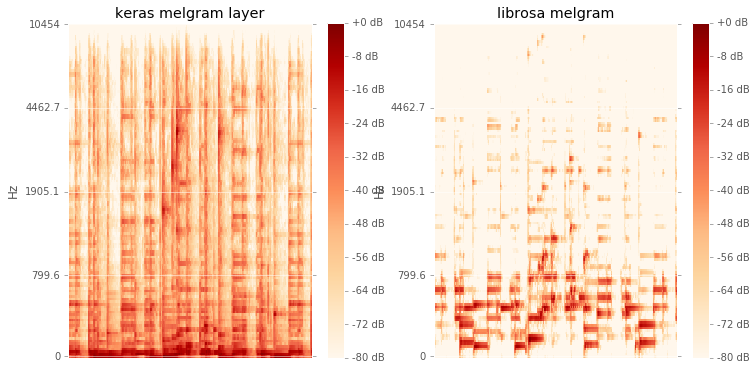

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
librosa.display.specshow(output[0, 0][::-1], y_axis='mel', sr=SR, hop_length=n_hop)
plt.colorbar(format='%+2.0f dB')
plt.title('keras melgram layer')
plt.subplot(1,2,2)
librosa.display.specshow(D, y_axis='mel', sr=SR, hop_length=n_hop)
plt.colorbar(format='%+2.0f dB')
plt.title('librosa melgram')

### Same, but in linear frequency scale

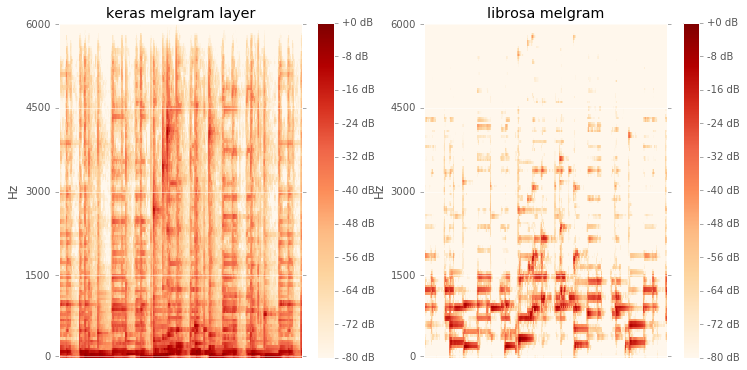

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
librosa.display.specshow(output[0, 0][::-1], y_axis='linear', sr=SR, hop_length=n_hop)
plt.colorbar(format='%+2.0f dB')
plt.title('keras melgram layer')
plt.subplot(1,2,2)
librosa.display.specshow(D, y_axis='linear', sr=SR, hop_length=n_hop)
plt.colorbar(format='%+2.0f dB')
plt.title('librosa melgram')